<h1 style="background: yellow; text-align: center; color: blue;">Наблюдаем за яблоками: когда цена изменится?</h1>

Когда мы смотрим на цену, мы можем подумать: а на сколько возросла или снизилась цена, по сравнению с прошлым периодом? 

Например, каждый день мы ходим на рынок за яблоками и замечаем там как меняется спрос и предложение в течение каждого месяца. Мы знаем, что в осенние месяцы цена яблок опускается вниз, потому что урожай приводит с растущему предложению, а в остальные месяцы цена растет, потому что предложения становится меньше. Спрос на яблоки при этом остается тем же. 

Предположим, мы не знаем, об этой особенности яблок и решили понаблюдать за изменением цены.<br>
1 день наблюдений: яблоки стоят 58 рублей за кг<br>
2 день наблюдений: яблоки стоят 60 рублей за кг,<br>
3 день наблюдений: яблоки стоят 63 рублей за кг,<br>
...<br>
Мы записали это в такую таблицу:

In [20]:
from datetime import datetime
import pandas as pd
import numpy as np

start_date = datetime(2024, 1, 1)
end_date = datetime(2024, 1, 8)
dates = pd.date_range(start=start_date, end=end_date)

# генерация случайных цен на яблоки (колебания в пределах разумного диапазона)
np.random.seed(228)  # для воспроизводимости
prices = [round(60 + np.random.uniform(-10, 10), 2) for _ in range(len(dates))]

apple_prices = pd.DataFrame({
    "Date": dates,
    "Price": prices
})

display(apple_prices)

,Date,Price
0,2024-01-01,58.48
1,2024-01-02,60.83
2,2024-01-03,63.77
3,2024-01-04,56.92
4,2024-01-05,58.78
5,2024-01-06,61.78
6,2024-01-07,63.07
7,2024-01-08,52.21


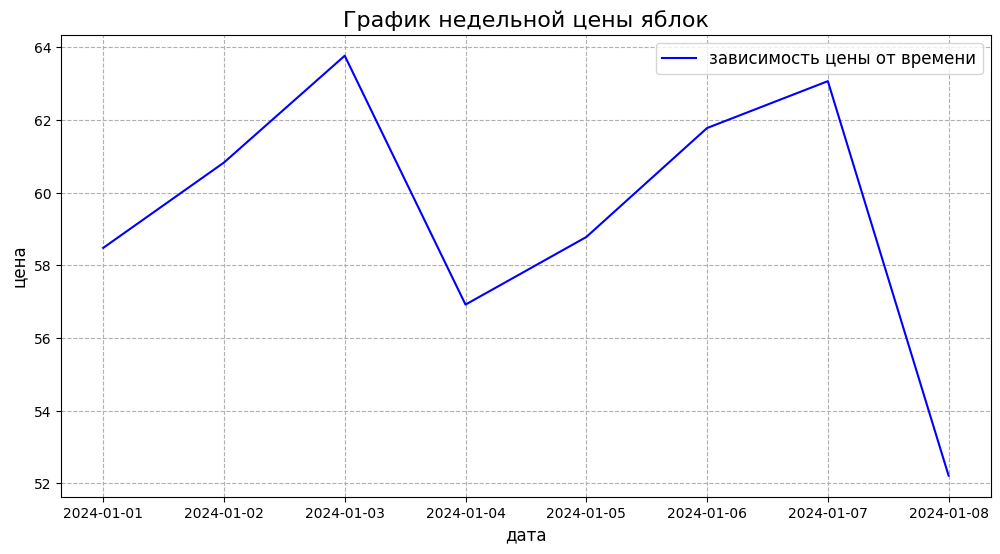

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(apple_prices['Date'], apple_prices['Price'], label='зависимость цены от времени', color='blue')

plt.title('График недельной цены яблок', fontsize=16)
plt.xlabel('дата', fontsize=12)
plt.ylabel('цена', fontsize=12)
plt.grid(True, linestyle='--', alpha=1)
plt.legend(fontsize=12)

plt.show()

По взгляду на этот график не совсем понятно, а будет ли цена на следующую неделю снижаться или расти. Чтобы как-то предсказать рост цены, мы можем подумать о балансе спроса и предложения на рынке. Колебания спроса и предложения может зависеть не только от каких-то реальных событий (урожай или неурожай / приток или отток фермеров ), но и от <b><u>ожиданий</u></b> участников рынка. К примеру, кто-то пустил слух, что в регионе стала распространяться яблочная мозаика, которая скоро уничтожит все посевы. Люди массово начали скупать яблоки, а продавцы взвинтили цены. Через некоторое время большинство покупателей уже приобрели яблоки, и желающих покупать их по высокой цене становится меньше. Продавцы начинают снижать цену, чтобы привлечь оставшихся покупателей. Позже узнается, что слух этот вообще неправда и цена еще долгое время держится низкой (а то и падает еще ниже), потому что люди и прошлые яблоки не доели, а предложения на рынке меньше не стало, только возросло. 

Такую ситуацию можно было бы предугадать заранее. Ведь когда покупатели начали массово скупать актив и цена начинает очень быстро взвинчиваться за короткий срок, то на какое-то время покупатели закроют свою потребность в яблоках и цена пойдет назад. Да, в <b>долгосрочной перспективе</b> цены могут и все время расти из-за некоторых фундаментальных факторов (увеличение стоимости обслуживания оборудования по сбору яблок и средних зарплат рабочим, популярность ЗОЖ и т.п.), но в краткосрочной перспективе после скоростного роста вероятна <b>коррекция</b> - откат в цену до ажиотажа.

Пусть $P_i$ цена $P$ в день $i$,<br>
тогда $\Delta P_i = P_i - P_{i-1}$ - изменение цены, при этои $i>0$

In [34]:
apple_prices["ΔP"] = apple_prices["Price"].diff()
apple_prices["Прирост"] = apple_prices["ΔP"].apply(lambda x: abs(x) if x > 0 else 0)
apple_prices["Падение"] = apple_prices["ΔP"].apply(lambda x: abs(x) if x < 0 else 0)

display(apple_prices)

,Date,Price,ΔP,Прирост,Падение
0,2024-01-01,58.48,NaN,0.00,0.00
1,2024-01-02,60.83,2.35,2.35,0.00
2,2024-01-03,63.77,2.94,2.94,0.00
3,2024-01-04,56.92,-6.85,0.00,6.85
4,2024-01-05,58.78,1.86,1.86,0.00
5,2024-01-06,61.78,3.00,3.00,0.00
6,2024-01-07,63.07,1.29,1.29,0.00
7,2024-01-08,52.21,-10.86,0.00,10.86


Если $\Delta P < 0$, то цена падает, если $\Delta P > 0$, то цена растёт.

Мы можем посчитать, сколько в среднем был прирост и падение за последнюю неделю. <i>Пока что для вычисления среднего мы попробуем формулу среднего арифметического, но можно попробовать и среднее рассчитать и по-другому (но это уже отдельная история...)</i>

$$ {\text Средний \; прирост} = \frac{{\displaystyle \sum_{i=1}^{i=n}} \max(P_i, 0)}{n} =
 \frac{{\displaystyle \sum_{i=1}^{i=7} \max(P_i, 0)}}{7} = \frac{2.35+2.94+0.00+1.86+3.00+1.29+0.00}{7} = 1.63
  $$

$$ {\text Среднее \; падение} = \frac{{\displaystyle \sum_{i=1}^{i=n}} \min(P_i, 0)}{n} =
 \frac{{\displaystyle \sum_{i=1}^{i=7} \min(P_i, 0)}}{7} = \frac{0.00+0.00+6.85+0.00+0.00+0.00+10.86}{7} = 2.53
  $$

Далее мы можем найти отношение среднего прироста к среднему падению, 
$$ RS = \frac{\text{Средний\; прирост}}{\text{Среднее\; падение}} = 
\frac{ n \cdot {\displaystyle \sum_{i=1}^{i=n}} \max(P_i, 0)}{ n \cdot {\displaystyle \sum_{i=1}^{i=n}  \min(P_i, 0)}} = 
\frac{1.63}{2.53} = 0.64
$$

Когда мы смотрим на это соотношение, то не совсем понятно как его оценивать. Мы примерно понимаем, что чем меньше среднее падение по сравнению со средним приростом, тем больше у нас значение $RS$, то есть тем быстрее за период $n$ цена успела перегреться. Но потолка у нас нет: величина перегретости может быть сколь угодно большой, и поэтому сравнивать перегретость цен будет тяжело. Мы можем оценить в процентах: $0.64*100 = 64%$, но проблема в том, что и процент может улетать бесконечно далеко, в 200%, 5000% и т.д., тогда нельзя будет сказать, вот, мол, с таких-то процентов цена точно перегрета, а с таких-то процентов недогрета. 

<h1 style="background: yellow; text-align: center; color: blue;">Нормализация</h1>

Нормализация значений - это вообще универсальная задача, которая требуется и в физике, и в машинном обучении (для подготовки данных для алгоритмов машинного обучения (градиентный спуск, KNN)), и в финансовом анализе, и много где еще.<br>Часто мы получаем какие-то соотношения, которые бы очень хотелось запихать в какой-то диапазон, например, от 1 до 100, где 0 - это <i>"очень тихо / дешево / вредно ..."</i> до 100 - <i>"очень громко / дорого / полезно"</i> и т.п. И для нормализации можно использовать разные подходы. Попробуем для простоты способ <b style="color: #af00ff; background-color: black;">масштабирования на основе диапазона (Min-Max нормализация)</b>,

<h4 style="color: #af00ff; background-color: black; text-align: center">Пробуем Min-Max нормализацию (линейное преобразование)</h4>

Возьмем, для простоты диапазон $[20, 80]$, и в этом диапазоне вытащим число $x = 50$. 
1. Сделаем $x = 50$ зависимым от диапазона. Вместо того чтобы смотреть на абсолютное значение $x=50$, мы будем смотреть на то, <b>на сколько это число больше</b> начала диапазона. То есть будем использовать <b>увеличение</b> от минимального значения $$x - x_{\min} = 50 - 20 = 30$$
2. Далее мы найдем длину диапазона $$x_{\max} - x_{\min} = 80 - 20 = 60$$
3. Осталось выяснить, сколько занимает <b>УВЕЛИЧЕНИЕ</b> относительно всей длины диапазона $$x_{\text{scaled}} = \frac{x - x_{\min}}{x_{\max} - x_{\min}} = \frac{30}{60} = 0.5$$

Т.е. число $x = 50$ занимает половину от диапазона $[20, 80]$.

По такому же принципу мы можем узнать насколько же полученный наш $RS = 0.64$ велик или мал во всем диапазоне цен. 

Но стоп... А какой у нас диапазон? Если приростов не было, а падения было сильное, то отношение будет в пределе стремится к нулю, а если падения не было, а прирост был сильный, то и максимальное значение диапазона в пределе будет стремится к бесконечности. То есть если $RS_{\min} = 0, \;\; RS_{\max} = \infty$, то

$$RS_{\text{scaled}} = \frac{RS - RS_{\min}}{RS_{\max} - RS_{\min}} = \lim_{RM_{\max} \rightarrow \infty} \frac{0.64 - 0}{\infty - 0} = 0$$

Выходит какая-то ерунда. Min-Max нормализация не подходит.

<h4 style="color: #5cffab; background-color: black; text-align: center">Нелинейные преобразования</h4>

На самом деле, даже с точки зрения интуиции нам не подходит линейное преобразование. Ведь рост цены на 20% и рост цены на 70% за короткий срок - это уже существенная разница. Даже если цена будет перегрета на 1000%, для нас это, в сущности, такая же "сильная перегретость" как и при шкале росте на 70%. То есть небольшие изменения $RS$ должны сильно влиять на результат, а какие-то большие цифры уже не вносят существенного вклада. 

Какие математические функции обладают таким свойством? Нам нужно принимать числа от 0 до $\infty$, придавать большое значение мелким числам, отдавать ответ в каком-то фиксированном диапазоне (например, от 0 до 1). Все стрелки указывают на гиперболические функции. Осталось подобрать какую именно.

Простой вариант $f(x) = \frac{1}{x}$ не подходит, потому что она несколько контринтуитивна: мы ожидаем, что чем больше $RS$ (то бишь $x$), тем больше $f(x)$. Но зависимость обратная. К тому же в нуле функция не определена и не ограничена сверху (функция будет бесконечно расти при $0<x<1$. 

Мы можем улучшить этот вариант: $f(x) = \frac{1}{x+1}$. Добавив единицу к $x$ мы сделали функцию определенной в 0, все равно же $RS$ не может быть меньше 0. Однако обратная зависимость всё еще нам мешает. Устранить это мы можем так: $$f(x) = 1 - \frac{1}{x+1}$$

<i style="color: gray; font-size: 98%;">Нормализаций вообще существует достаточно много: <b style="color: #af00ff; background-color: black;">масштабирования на основе диапазона (Min-Max нормализация)</b> (если значения положительные и имеют ограниченный диапазон без больших выбросов), <b style="color: #ff70f6; background-color: black;">Z-score нормализация (стандартизация)</b> (если у нас данные имеют форму нормального распределения), <b style="color: #5cffab; background-color: black;">логистическая нормализация</b> (когда в данных есть выбросы и нужно сгладить влияние больших чисел), <b style="color: #a1ff6c; background-color: black;">квантильная нормализация</b> (если числа из диапазона нам нужно представить в форме нормального распределения) и т.д.</i>

<h1 style="background: yellow; text-align: center; color: blue;">Формула RSI</h1>

Немножко модифицировав полученную формулу для того, чтобы числа были в диапазоне от 0 до 100, мы получим формулу $RSI$ (Relative Strength Index):
$$ RSI = 100 - \frac{100}{1 + RS} $$

Мы знаем, что:
- Если $RS = 1$, то падения цены равны приросту
- Если $RS < 1$, то в среднем падения преобладают
- Если $RS > 1$, то преобладает прирост


Тогда $RSI$ будет давать такую картину:

1. Если $RS = 0$ (падения полностью доминируют), то:
   $$ RSI = 100 - \frac{100}{1 + 0} = 100 - 100 = 0 $$

2. Если $RS = 1$ (приросты равны падениям), то:
   $$ RSI = 100 - \frac{100}{1 + 1} = 100 - 50 = 50 $$

3. Если $RS$ становится очень большим (приросты преобладают), то $RS \to \infty$:
   $$ RSI = 100 - \frac{100}{1 + \infty} = 100 - 0 = 100 $$

Таким образом, мы получили индекс, который находится в фиксированном диапазоне [0, 100]. Это позволяет легко оценивать состояние рынка:

- Значения RSI ниже 30 обычно интерпретируются как сигнал перепроданности (цена слишком низкая, возможен разворот вверх).
- Значения RSI выше 70 указывают на перекупленность (цена слишком высокая, возможен разворот вниз).

Важно понимать, что эти пороговые значения (30 и 70) не являются жесткими правилами. Они могут корректироваться в зависимости от волатильности актива или стратегии трейдинга. Например, для более волатильных активов могут использоваться уровни 20 и 80.

Пришла пора анализировать наши яблоки! В последний день семидневный $RSI$ бы выглядел так: $$RSI = 100 - \frac{100}{1+0.64} =39.02$$

Т.е. цена близка к перепроданности и скорее всего в ближайшее время яблоки могут подорожать.


Если бы период для вычисления $RS$ мы взяли не все 7 дней, а три, то в последний день график бы явно показал бы перелет за границу в 30.

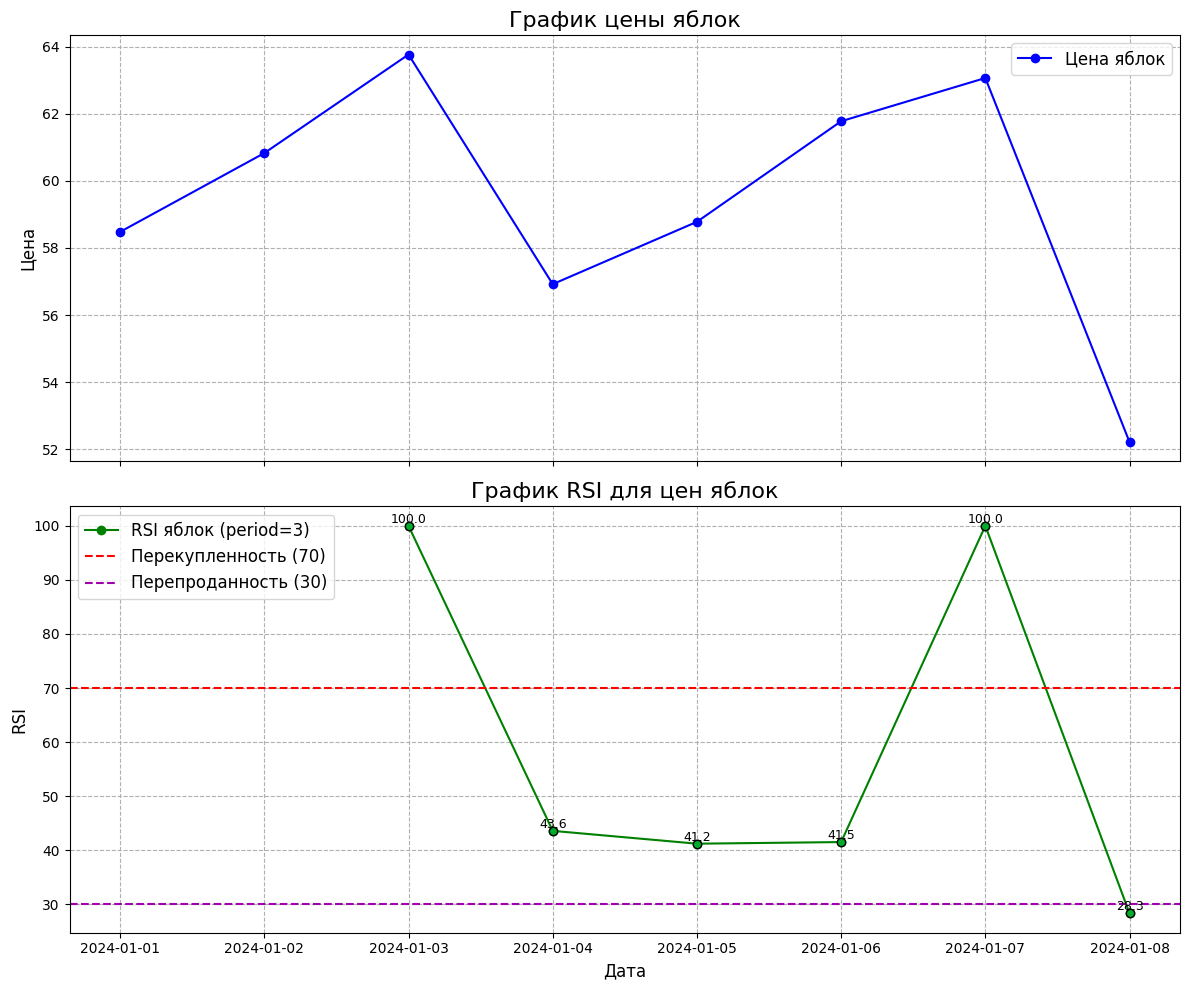

In [110]:
# Построение двух графиков: цены и RSI
# Изменение периода расчета на 3 дня
period = 3

# Пересчет среднего прироста и среднего падения
apple_prices['Avg_Gain'] = apple_prices['Gain'].rolling(window=period).mean()
apple_prices['Avg_Loss'] = apple_prices['Loss'].rolling(window=period).mean()

# Пересчет RS и RSI
apple_prices['RS'] = apple_prices['Avg_Gain'] / apple_prices['Avg_Loss']
apple_prices['RSI'] = 100 - (100 / (1 + apple_prices['RS']))

fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# График цены
axes[0].plot(apple_prices['Date'], apple_prices['Price'], label='Цена яблок', color='blue', marker='o')
axes[0].set_title('График цены яблок', fontsize=16)
axes[0].set_ylabel('Цена', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=1)
axes[0].legend(fontsize=12)

# График RSI
axes[1].plot(apple_prices['Date'], apple_prices['RSI'], label='RSI яблок (period=3)', color='green', marker='o')
axes[1].axhline(70, color='red', linestyle='--', label='Перекупленность (70)')
axes[1].axhline(30, color='#a000ad', linestyle='--', label='Перепроданность (30)')
axes[1].set_title('График RSI для цен яблок', fontsize=16)
axes[1].set_xlabel('Дата', fontsize=12)
axes[1].set_ylabel('RSI', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=1)
axes[1].legend(fontsize=12)

for i, row in apple_prices.iterrows():
    if not pd.isna(row['RSI']):
        plt.scatter(row['Date'], row['RSI'], color='#00ad2b', edgecolor='black', zorder=5)
        plt.text(row['Date'], row['RSI'], f"{row['RSI']:.1f}", fontsize=9, ha='center', va='bottom')

# Оформление графиков
plt.tight_layout()
plt.show()


<h1 style="background: yellow; text-align: center; color: blue;">А как еще можно вычислить среднее?</h1>
to be continued...